<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상가(상권) 정보 분석하기
- https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
%ls data

상가업소정보_201912_01.csv  seoul_municipalities_geo_simple.json


In [7]:
df=pd.read_csv('./data/상가업소정보_201912_01.csv',sep='|')
df.shape

(573680, 39)

In [8]:
pd.options.display.max_columns=39

In [9]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [10]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


In [12]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [13]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [15]:
df.dtypes

,0
상가업소번호,int64
상호명,object
지점명,object
상권업종대분류코드,object
상권업종대분류명,object
상권업종중분류코드,object
상권업종중분류명,object
상권업종소분류코드,object
상권업종소분류명,object
표준산업분류코드,object


In [16]:
n=df.isnull().sum()
n

,0
상가업소번호,0
상호명,1
지점명,497006
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,34390


<Axes: >

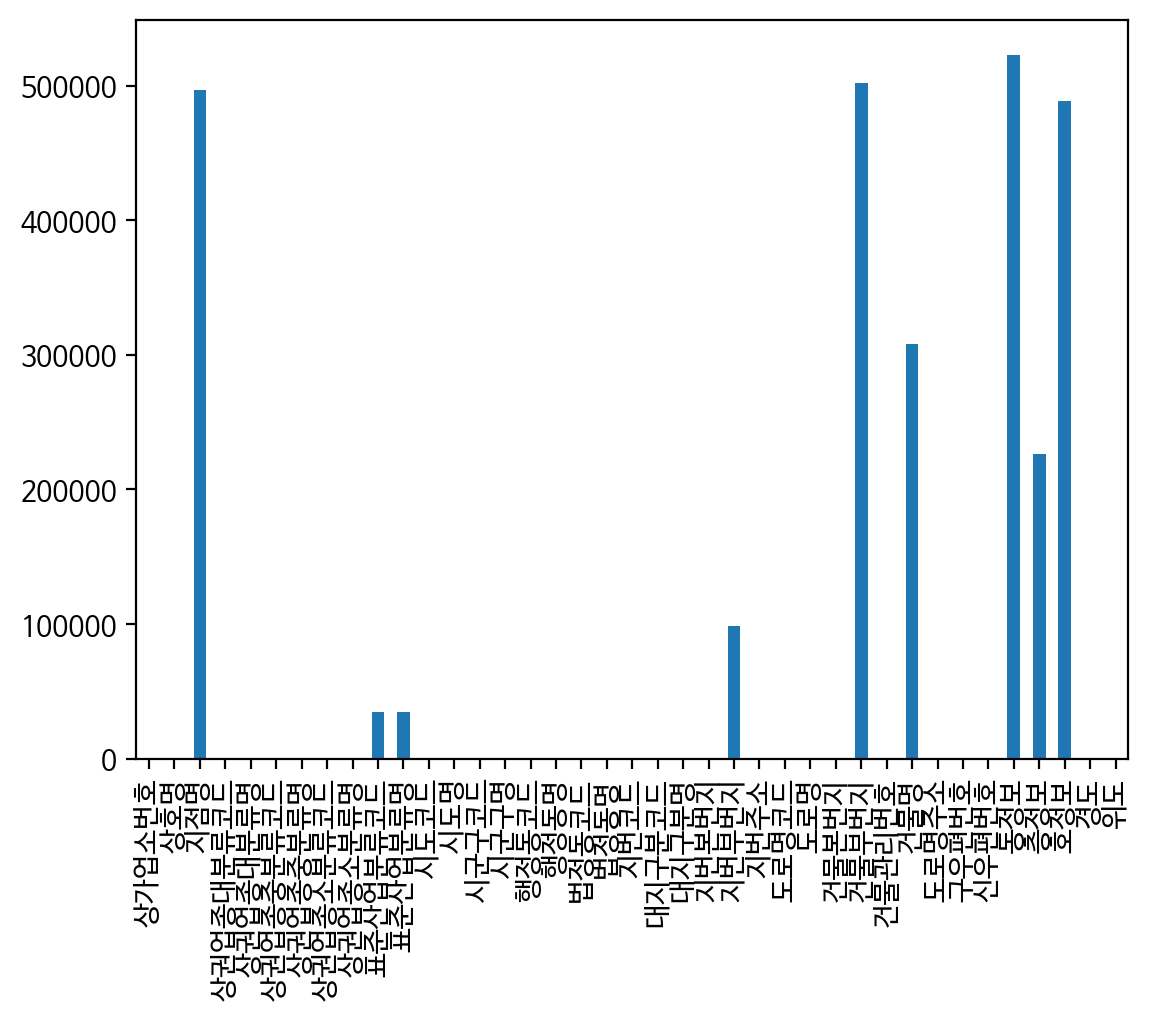

In [24]:
n.plot.bar()

<Axes: >

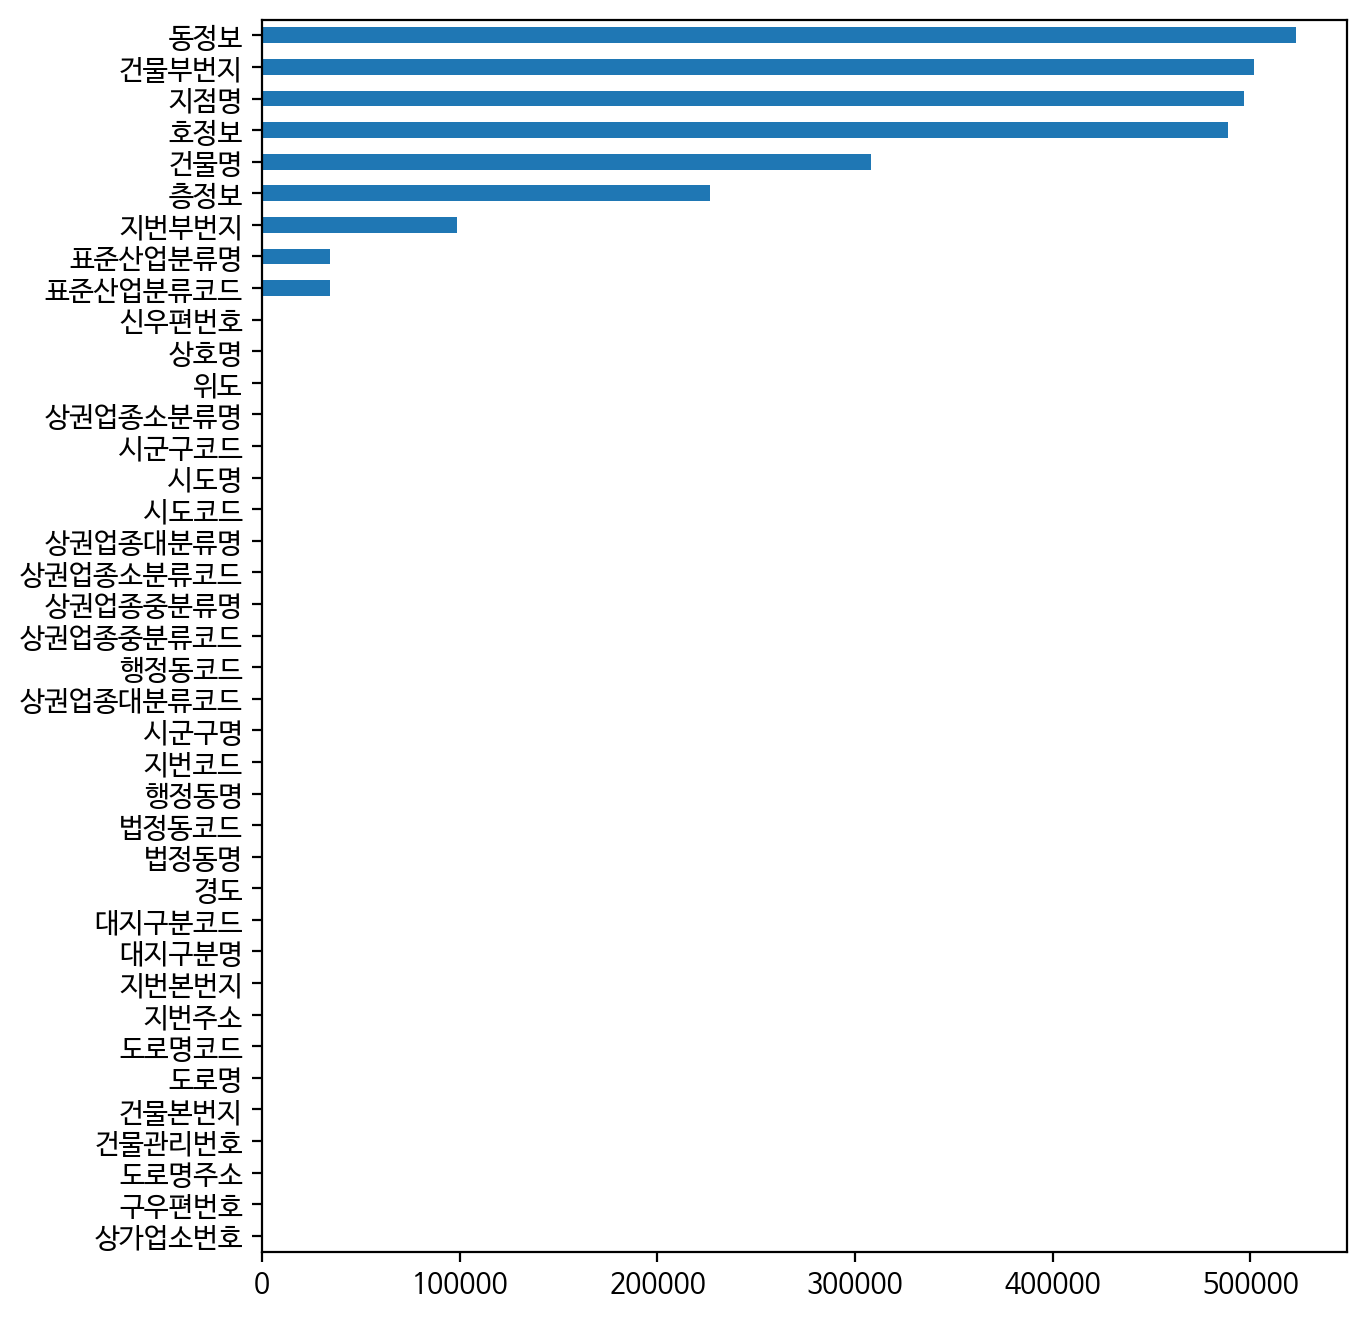

In [23]:
n.sort_values().plot.barh(figsize=(7,8))

<Axes: >

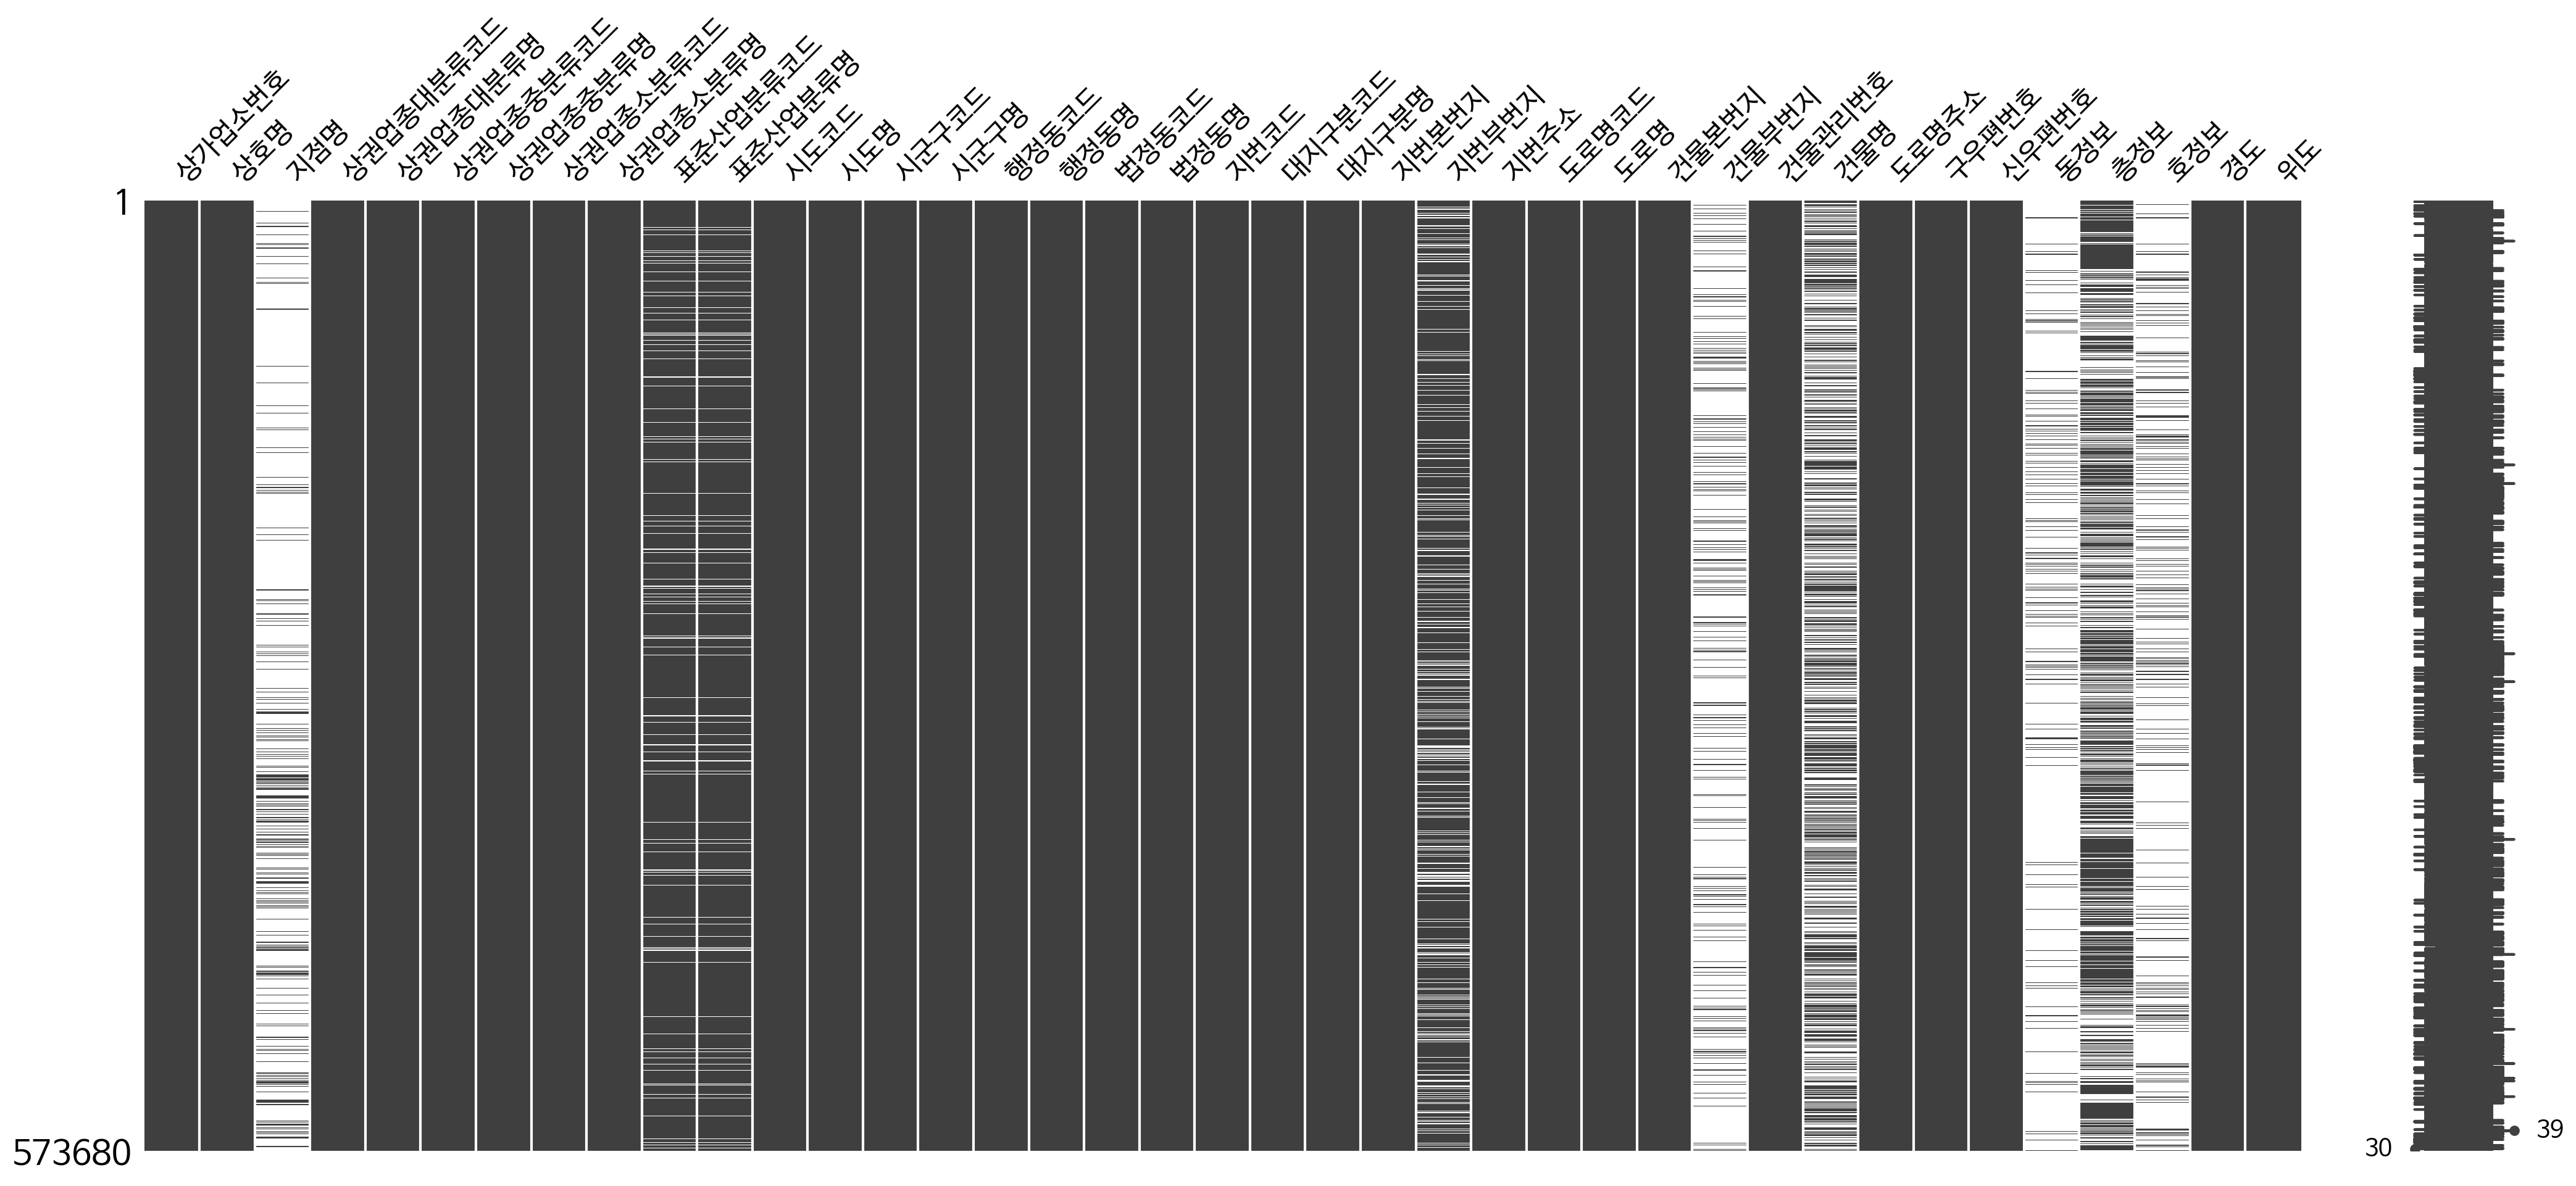

In [28]:
import missingno as msno

msno.matrix(df)

<Axes: >

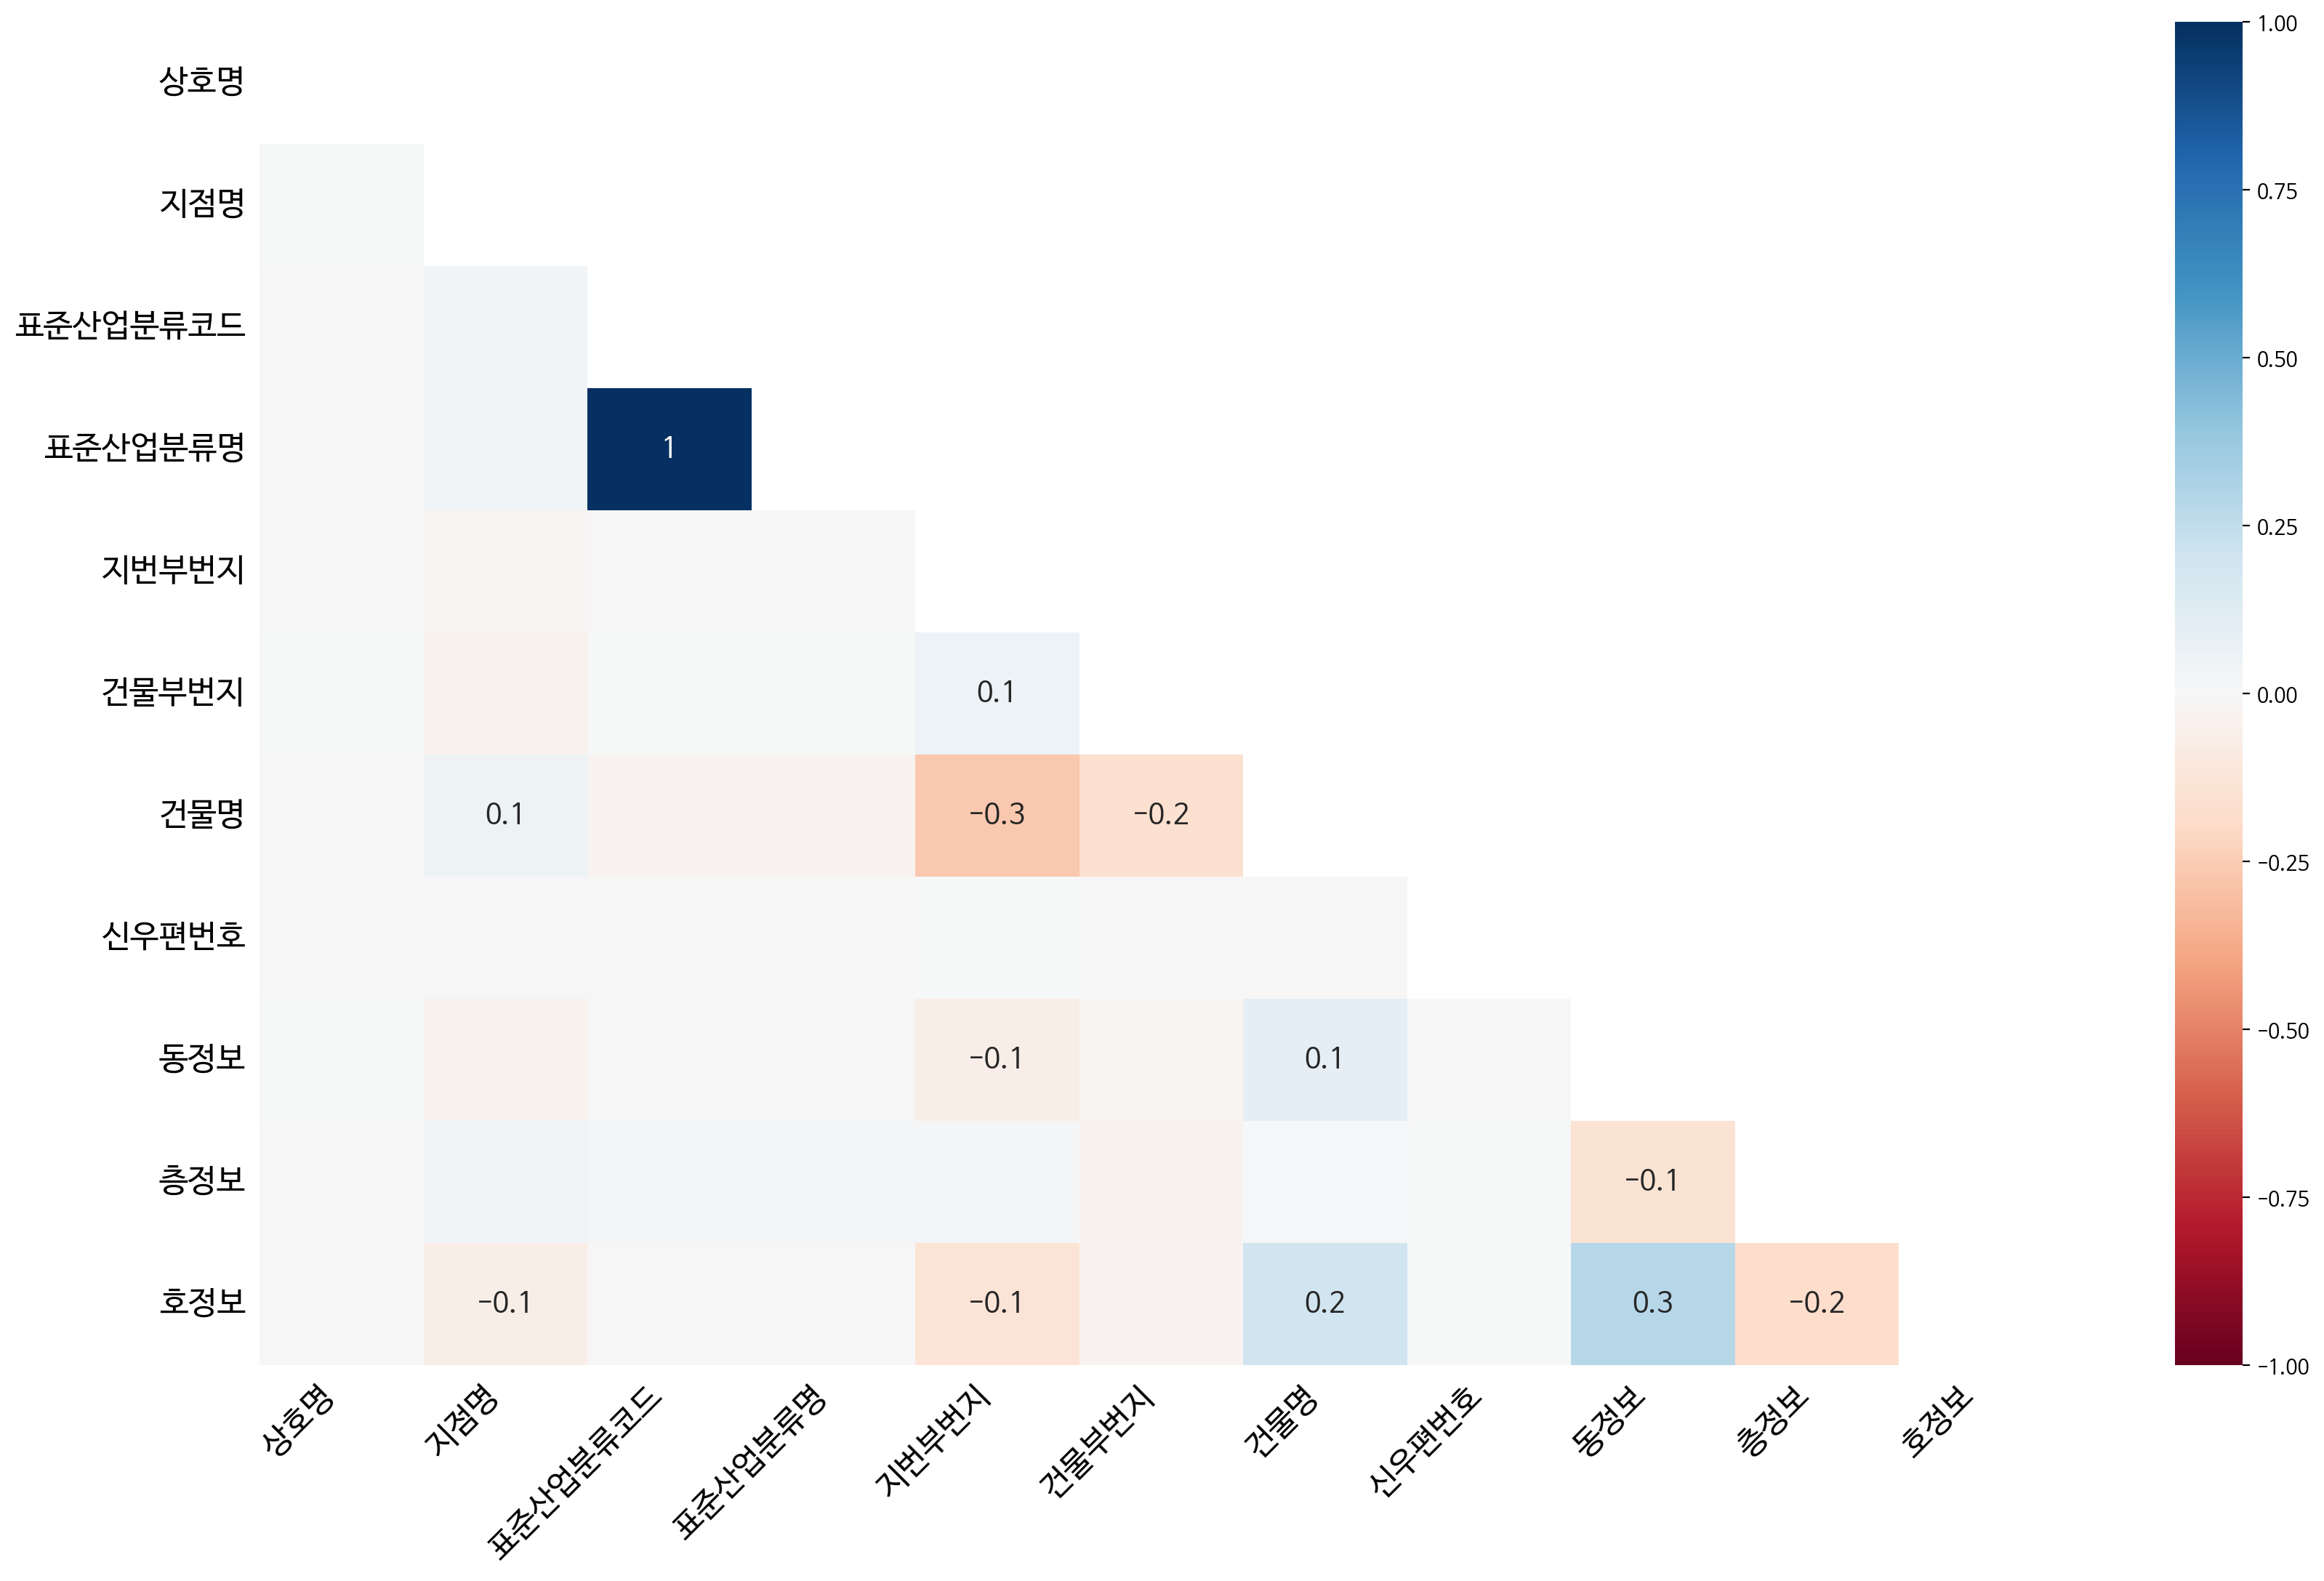

In [29]:
msno.heatmap(df)

<Axes: >

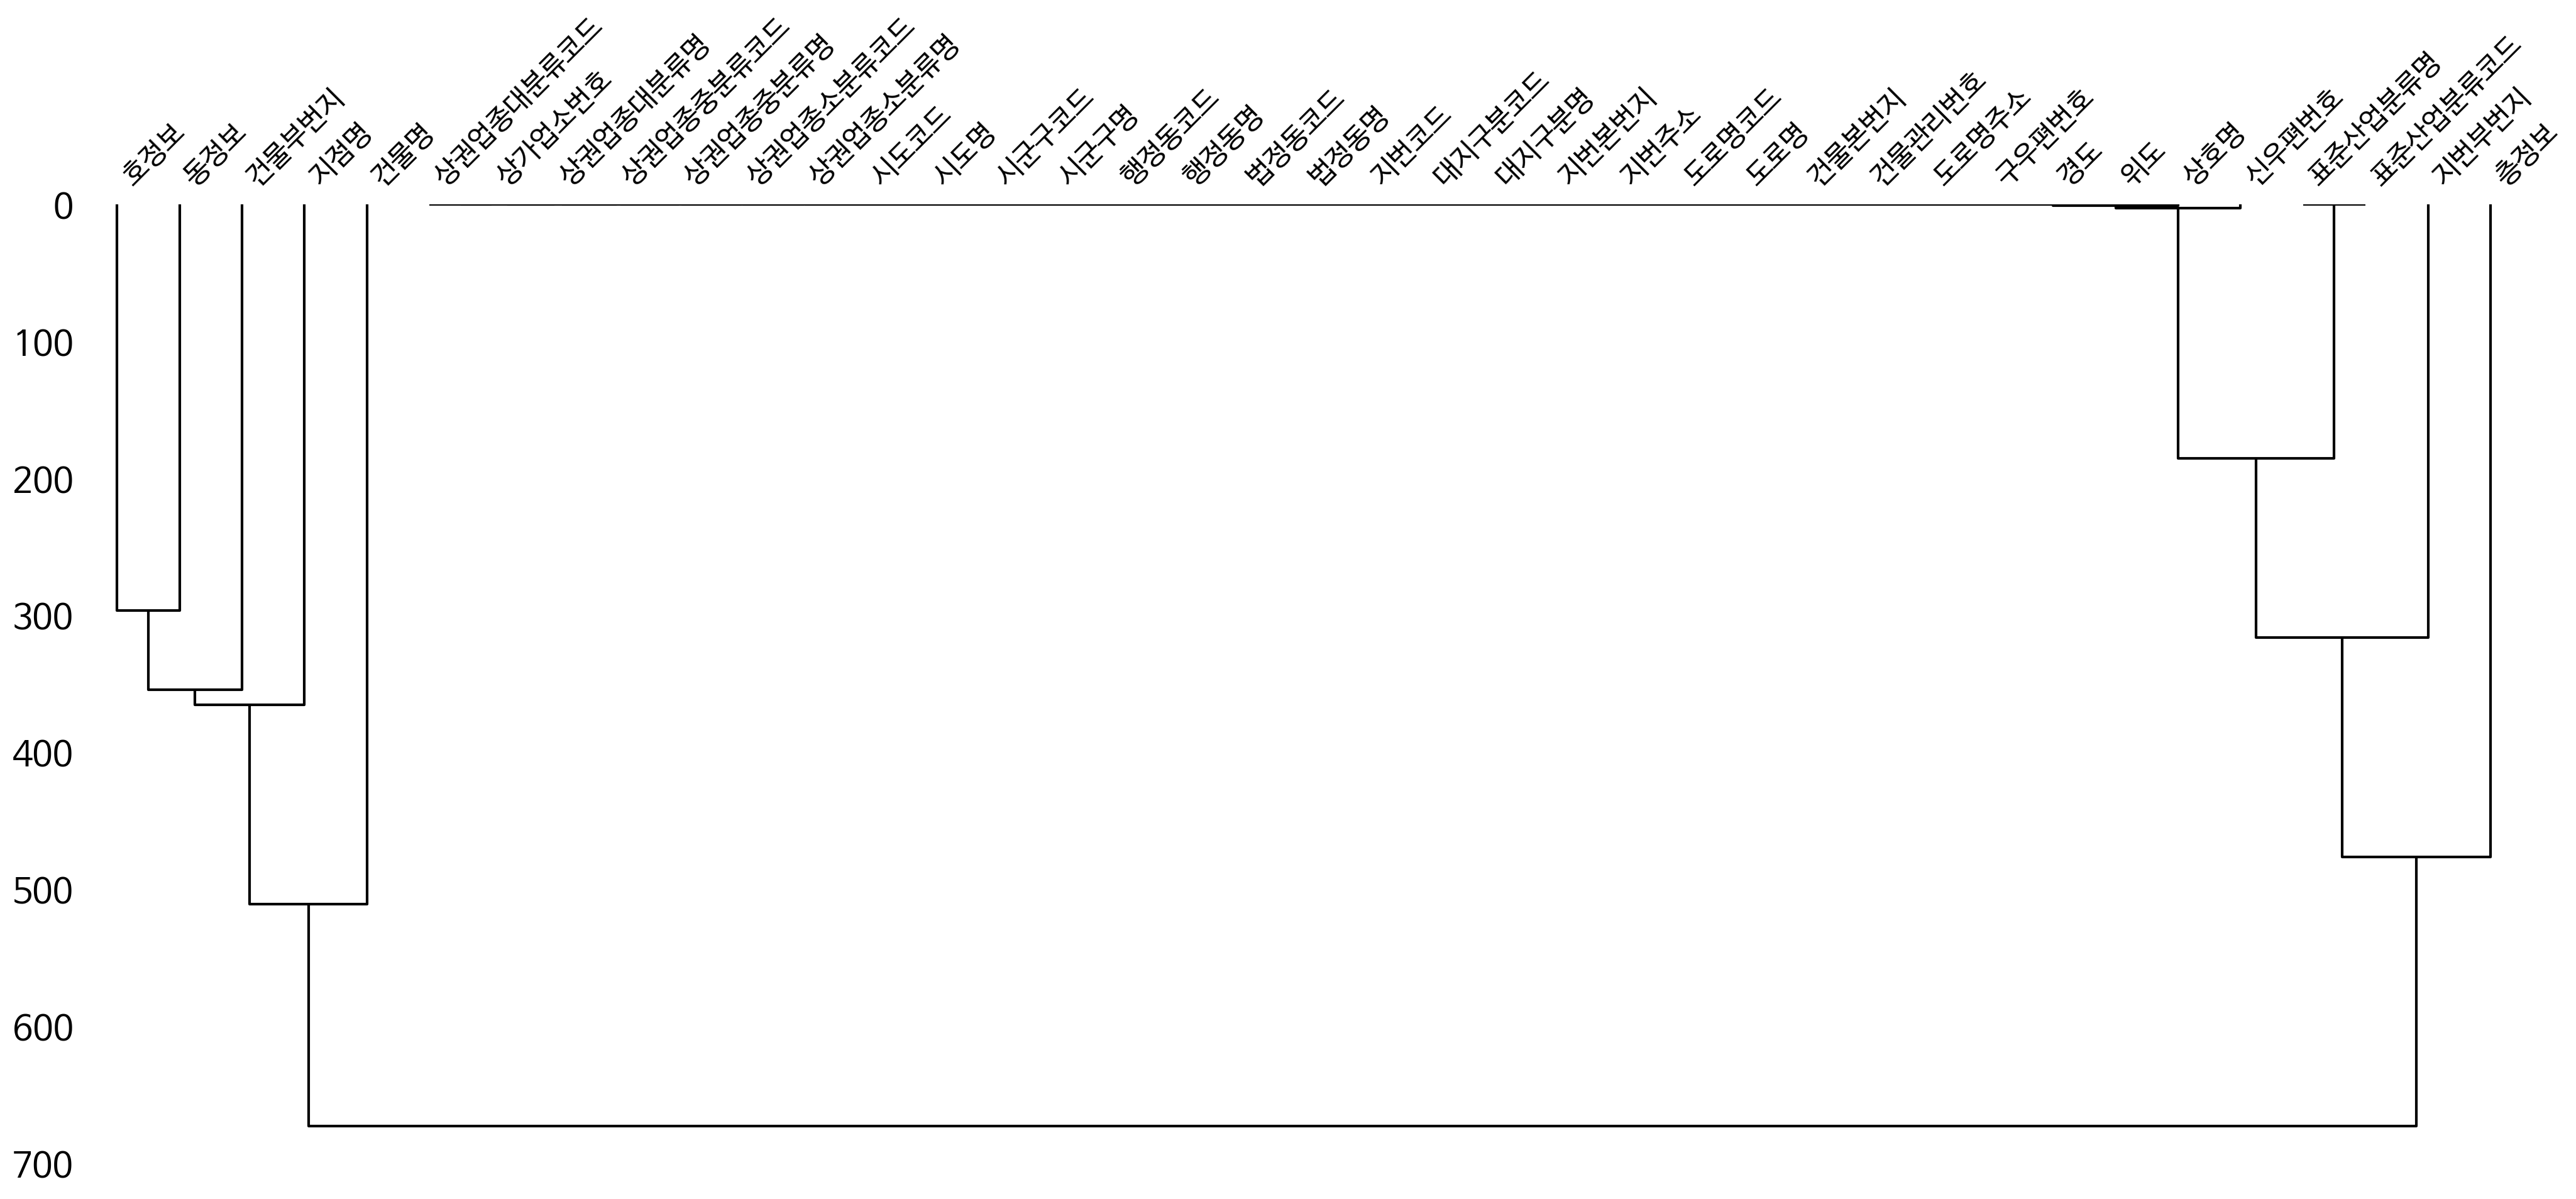

In [30]:
msno.dendrogram(df)

In [31]:
not_use=n.sort_values(ascending=False).head(9)
not_use_col=not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [32]:
print(df.shape)
df=df.drop(not_use_col,axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

In [35]:
cols=df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [36]:
cols_code=cols[cols.str.contains('코드|번호')]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [37]:
print(df.shape)
df=df.drop(cols_code,axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


In [39]:
df['상호명'].head()

,상호명
0,와라와라호프
1,커피빈코리아선릉로93길점
2,프로포즈
3,싱싱커피&토스트
4,가락사우나내스낵


In [40]:
df[['상호명','도로명주소']].head()

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71


In [41]:
df.loc[0]

,0
상호명,와라와라호프
상권업종대분류명,음식
상권업종중분류명,유흥주점
상권업종소분류명,호프/맥주
시도명,서울특별시
시군구명,강남구
행정동명,대치1동
법정동명,대치동
대지구분명,대지
지번본번지,604


In [42]:
df.loc[[0,1,2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [47]:
df.loc[0,'상호명']

'와라와라호프'

In [48]:
df.loc[[0,1,2],'상호명']

,상호명
0,와라와라호프
1,커피빈코리아선릉로93길점
2,프로포즈


In [49]:
df.loc[[0,1,2],['상호명','도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


In [50]:
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [51]:
df.iloc[-5:,-5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099


In [52]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [53]:
df[['위도','경도']].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [54]:
df['위도'].quantile(q=0.25) # 1사분위 수 (25%)

35.2154217343356

In [55]:
df['위도'].var() # 분산

1.1691762199811804

In [56]:
import numpy as np

np.sqrt(df['위도'].var()) # 분산

1.081284523139576

In [57]:
df['위도'].std()

1.081284523139576

<Axes: xlabel='위도', ylabel='Density'>

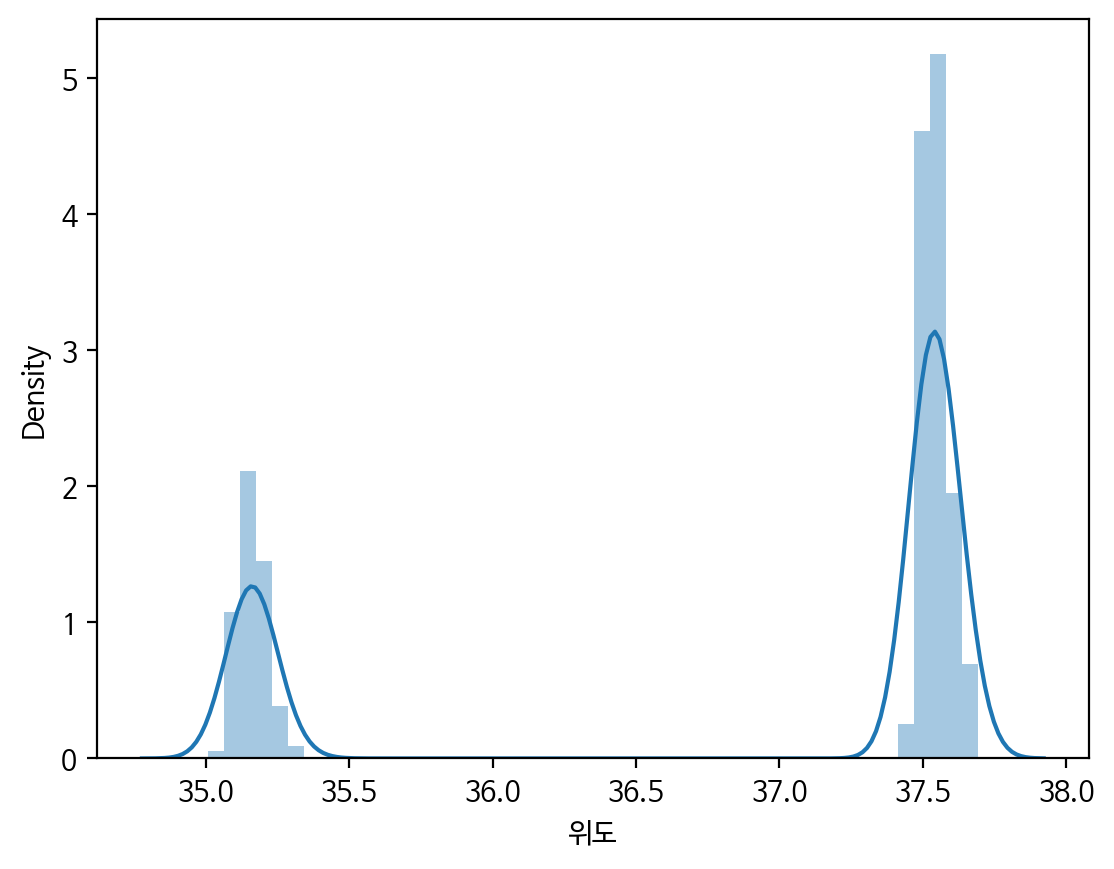

In [58]:
sns.distplot(df['위도'])

<Axes: xlabel='경도', ylabel='Density'>

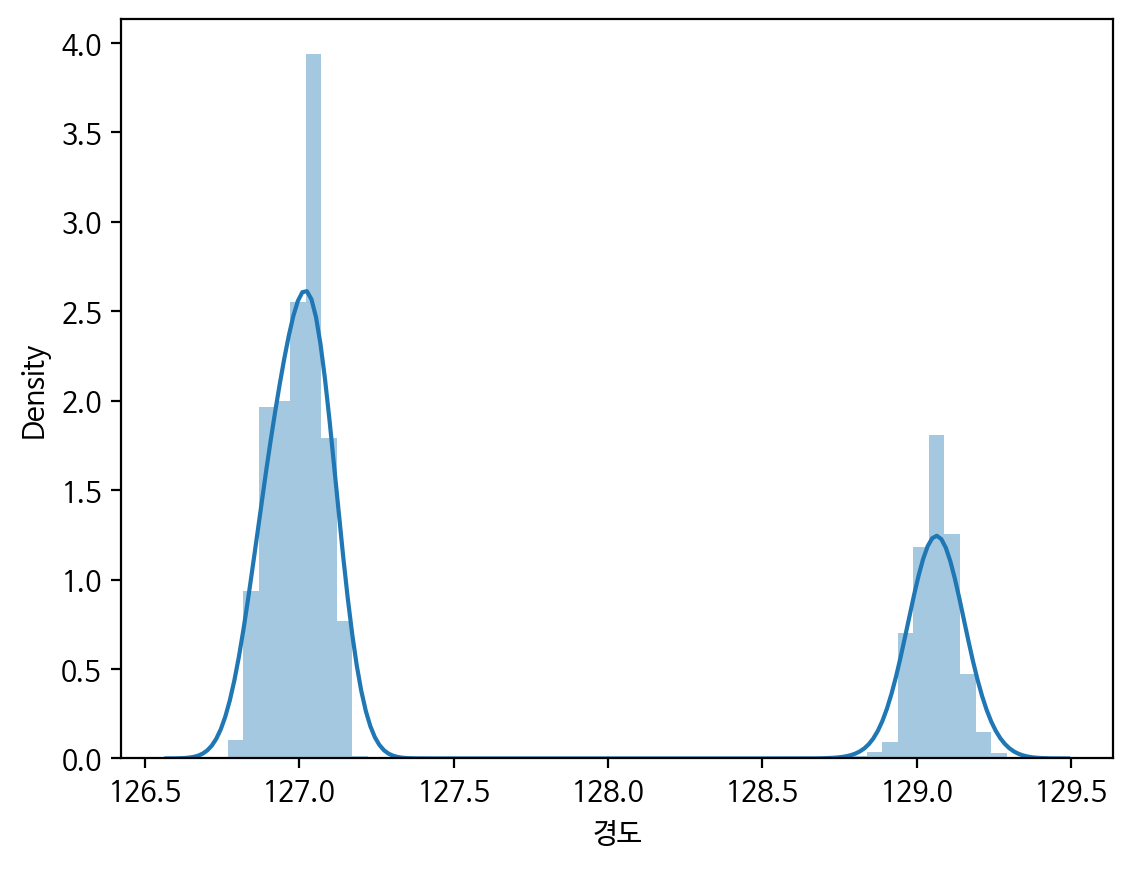

In [59]:
sns.distplot(df['경도'])

<Axes: xlabel='위도', ylabel='Density'>

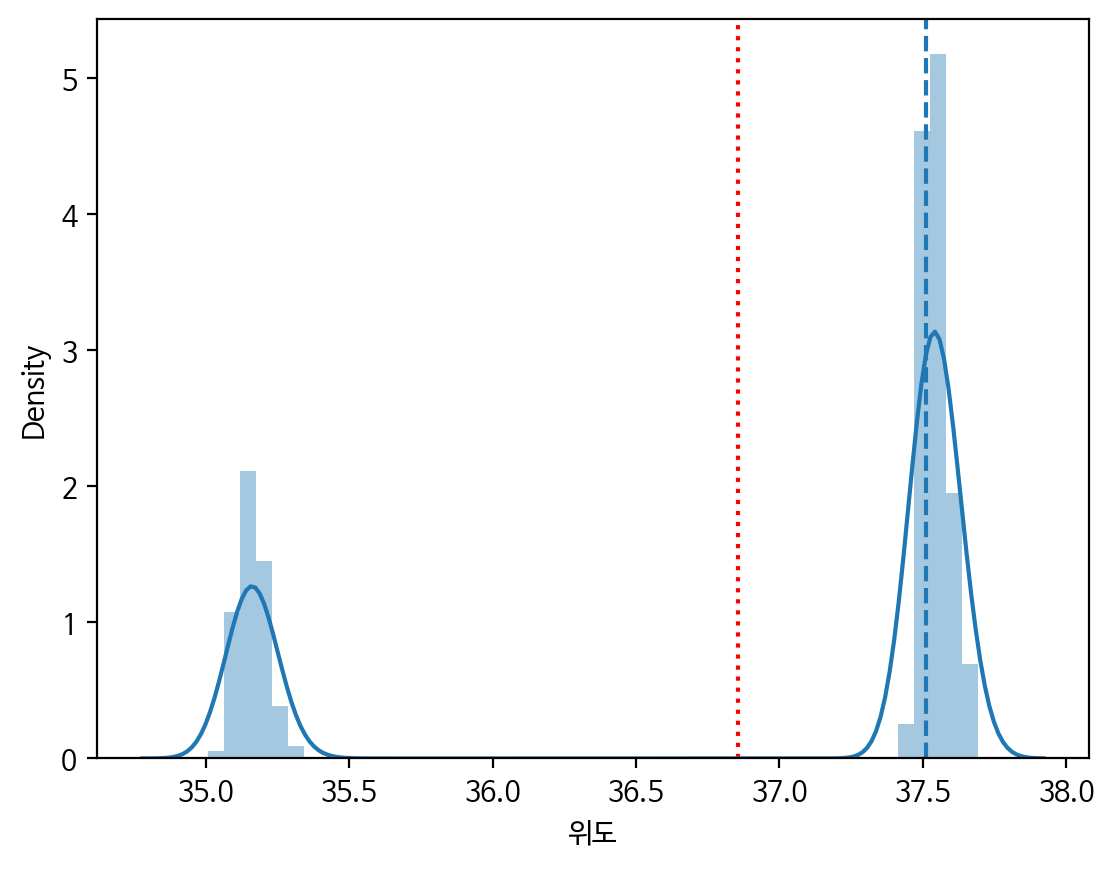

In [60]:
plt.axvline(df['위도'].mean(),linestyle=':',color='r')
plt.axvline(df['위도'].median(),linestyle='--')
sns.distplot(df['위도'])

In [61]:
corr=df.corr(numeric_only=True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


<Axes: >

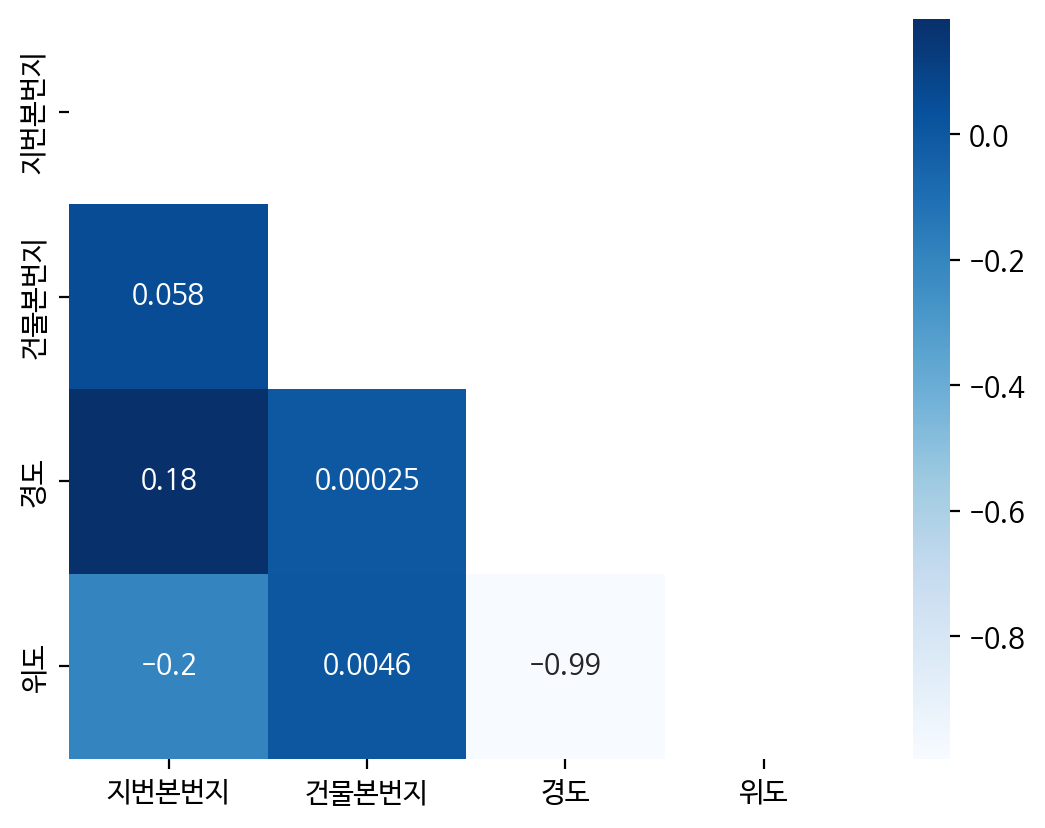

In [62]:
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,cmap='Blues',mask=mask)

<Axes: xlabel='경도', ylabel='위도'>

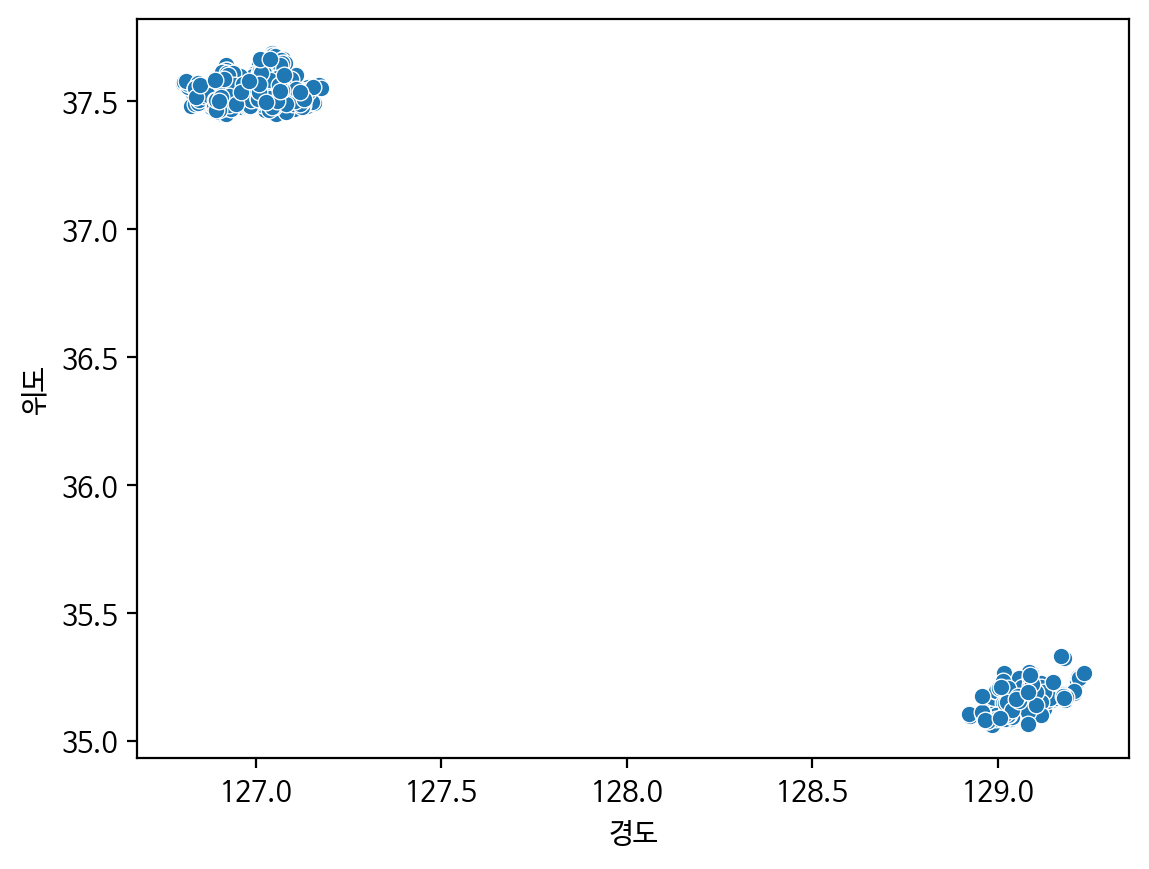

In [64]:
sns.scatterplot(data=df.sample(1000),x='경도',y='위도')

<Axes: xlabel='경도', ylabel='위도'>

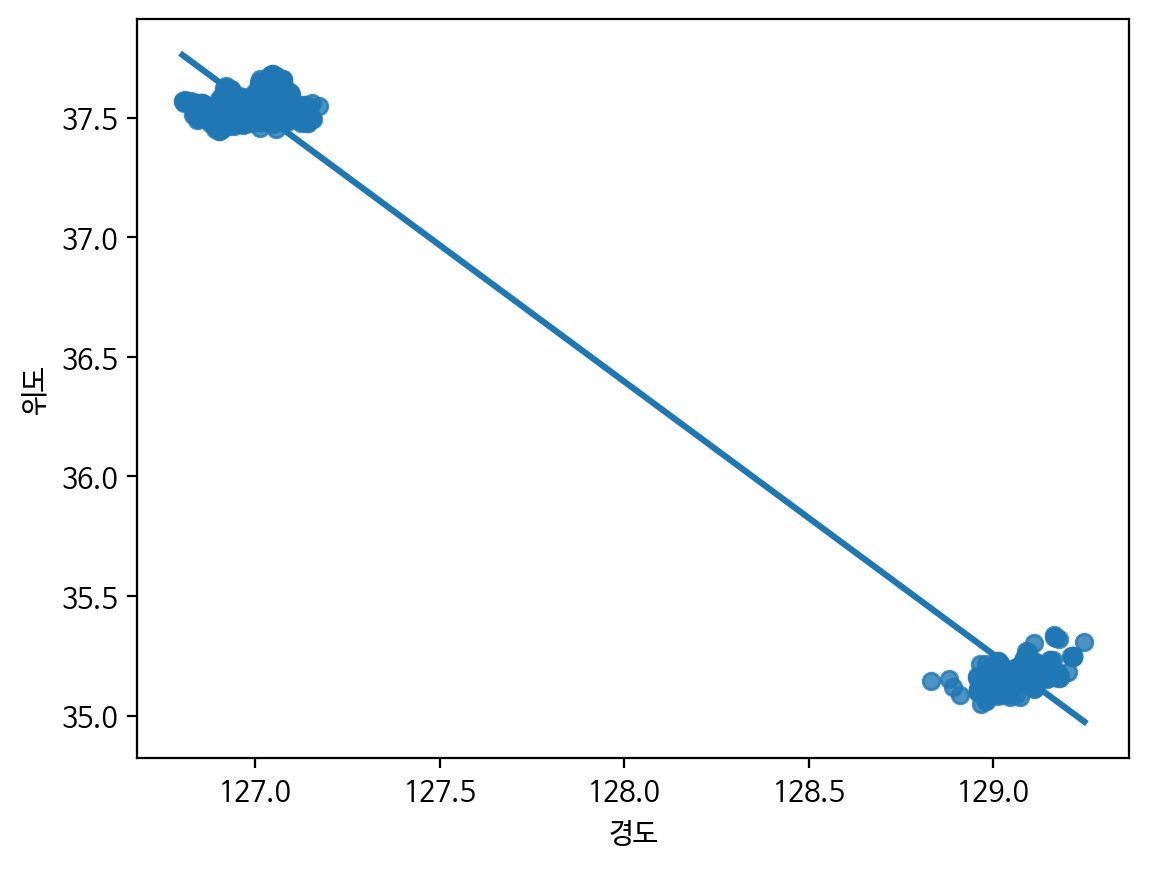

In [67]:
sns.regplot(data=df.sample(1000),x='경도',y='위도')

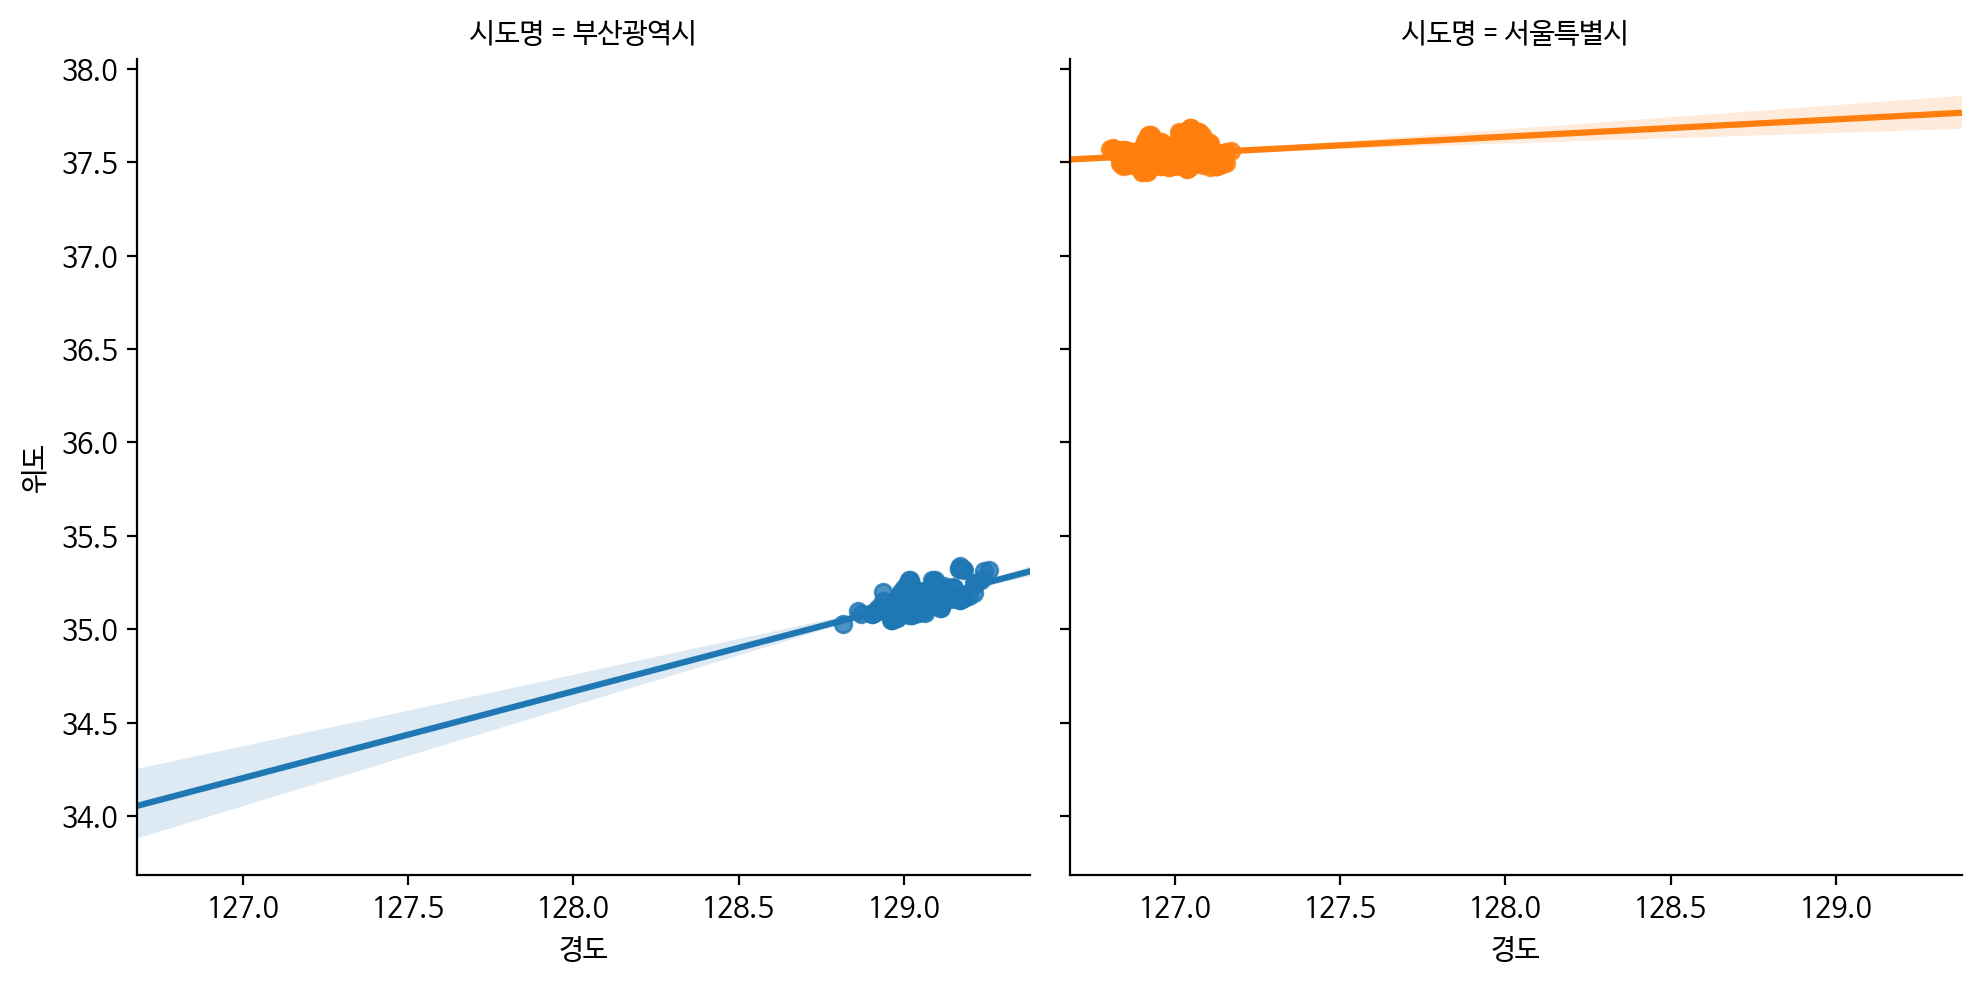

In [70]:
sns.lmplot(data=df.sample(1000),x='경도',y='위도',hue='시도명',
           col='시도명', # 각 카테고리별로 별도의 그래프 생성
           truncate=False, # 회귀선 길이 조정 옵션, False : 회귀선이 데이터 범위 초과해서 그려짐
           fit_reg=True) # 선형 회귀선을 추가할지 여부

In [72]:
df.describe(include='object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [73]:
df['상권업종대분류명'].describe()

,상권업종대분류명
count,573680
unique,9
top,음식
freq,185516


In [75]:
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [74]:
df['상권업종대분류명'].nunique()

9

In [76]:
df['상권업종대분류명'].mode() # 최빈값

,상권업종대분류명
0,음식


In [77]:
df['상권업종대분류명'].value_counts()

,count
상권업종대분류명,
음식,185516
소매,179460
생활서비스,97789
학문/교육,42477
의료,25509
부동산,20918
관광/여가/오락,16377
숙박,5327
스포츠,307


In [78]:
df_food=df[df['상권업종대분류명']=='음식'].copy()
df_food.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [79]:
df[df['시군구명']=='강남구'].head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742


In [80]:
df[(df['시군구명']=='강남구') & (df['상권업종대분류명']=='음식')]['상권업종중분류명'].value_counts()

,count
상권업종중분류명,
한식,4371
커피점/카페,2790
유흥주점,1573
양식,1573
일식/수산물,1255
분식,1197
패스트푸드,786
제과제빵떡케익,650
닭/오리요리,539


In [81]:
df.loc[(df['시군구명']=='강남구') & (df['상권업종대분류명']=='음식'),'상권업종중분류명'].value_counts()

,count
상권업종중분류명,
한식,4371
커피점/카페,2790
유흥주점,1573
양식,1573
일식/수산물,1255
분식,1197
패스트푸드,786
제과제빵떡케익,650
닭/오리요리,539


In [83]:
df_seoul_food=df[(df['시도명']=='서울특별시') & (df['상권업종대분류명']=='음식')].copy()
df_seoul_food.shape

(132889, 16)

In [84]:
food_gu=df_seoul_food.groupby(['시군구명','상권업종중분류명'])['상호명'].count()
food_gu.head()

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

In [85]:
food_gu.unstack().iloc[:5,:5]

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식
시군구명,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0
강동구,4.0,318.0,138.0,24.0,509.0
강북구,2.0,208.0,97.0,6.0,329.0
강서구,16.0,323.0,145.0,21.0,531.0
관악구,11.0,324.0,118.0,11.0,461.0


<Axes: xlabel='상권업종중분류명'>

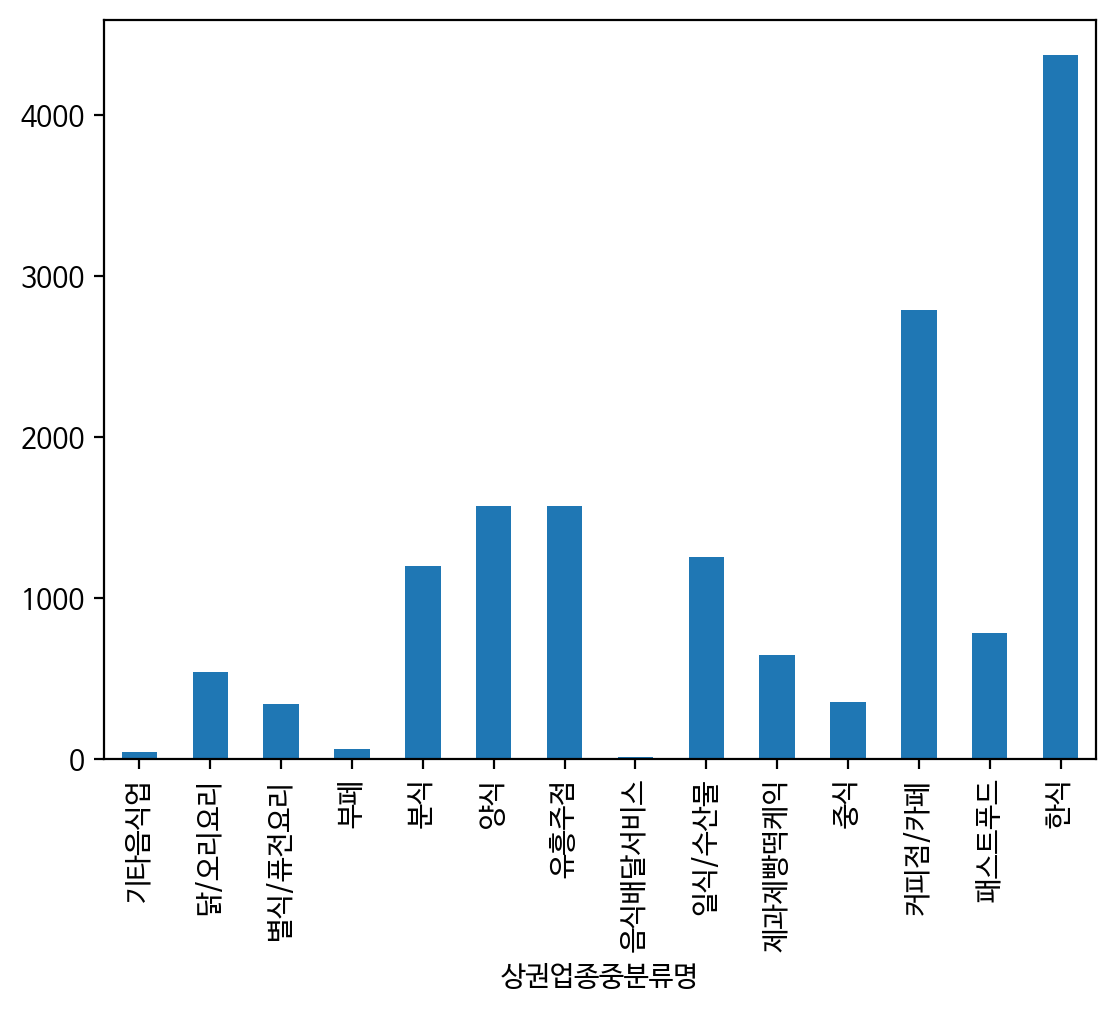

In [86]:
food_gu.unstack().loc['강남구'].plot.bar()

In [87]:
food=food_gu.reset_index()
food=food.rename(columns={'상호명':'상호수'})
food.head()

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197


<Axes: xlabel='상권업종중분류명', ylabel='상호수'>

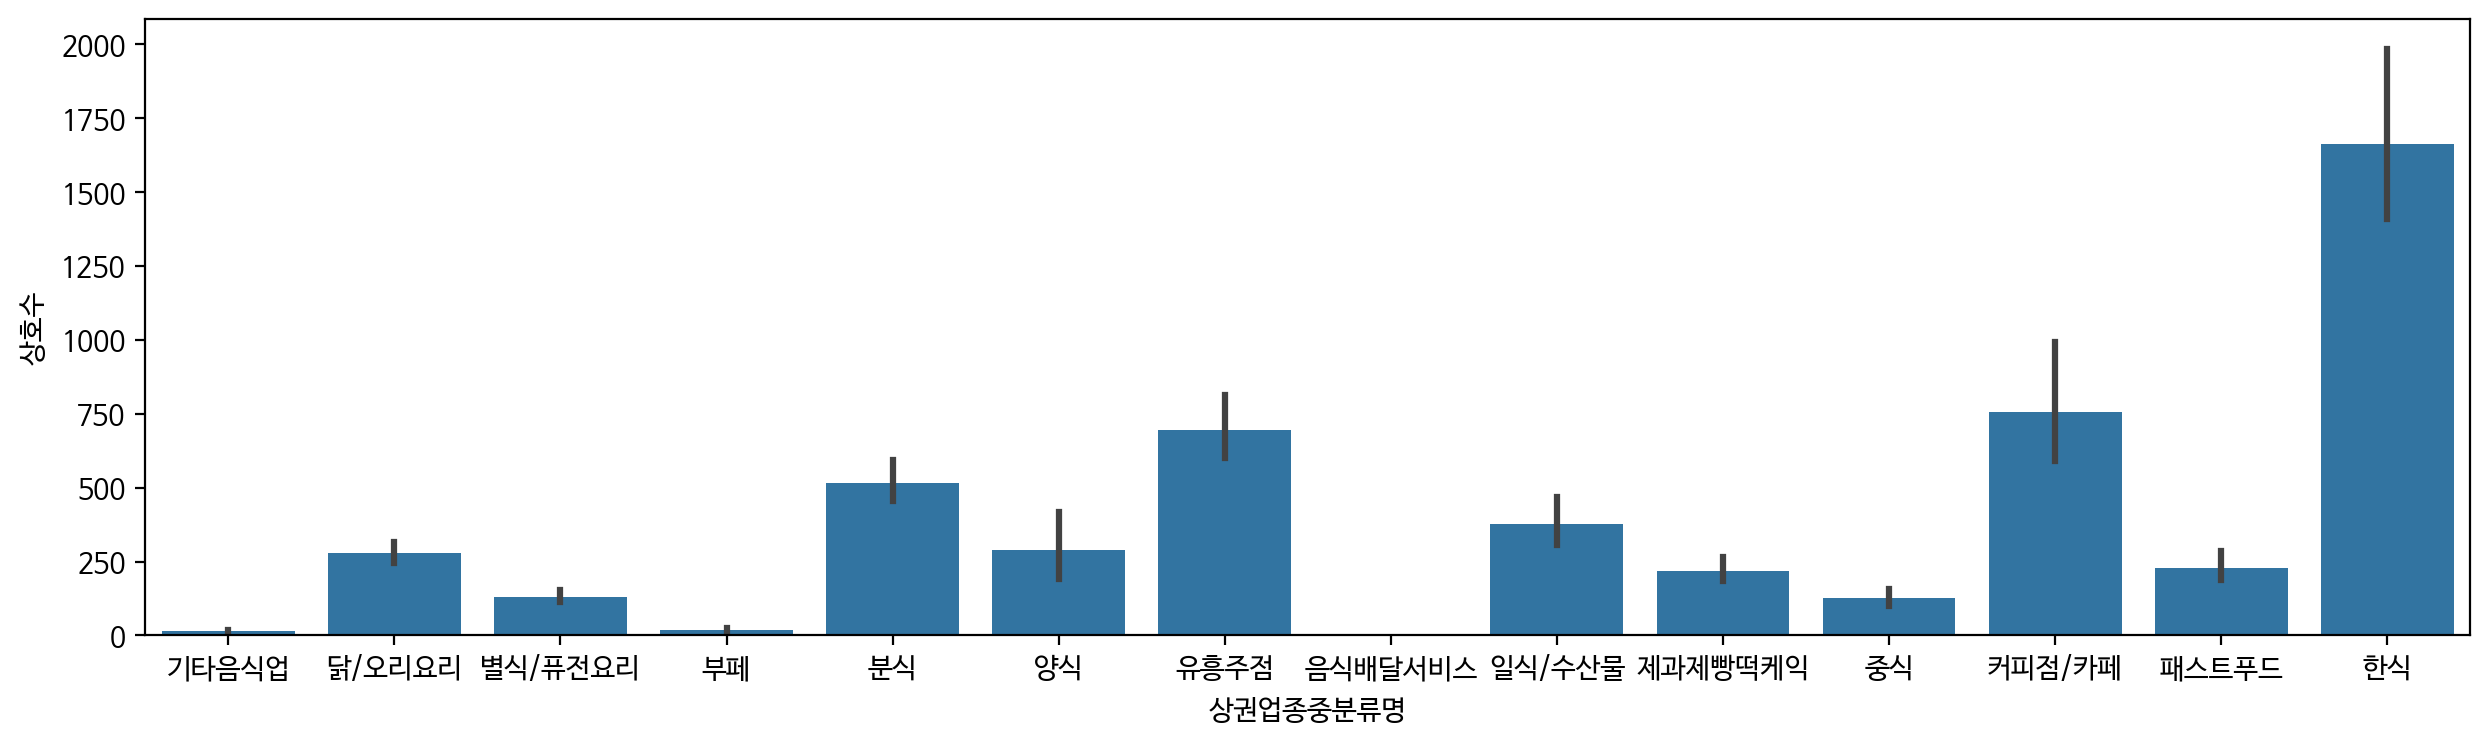

In [88]:
plt.figure(figsize=(15,4))
sns.barplot(data=food,x='상권업종중분류명',y='상호수')

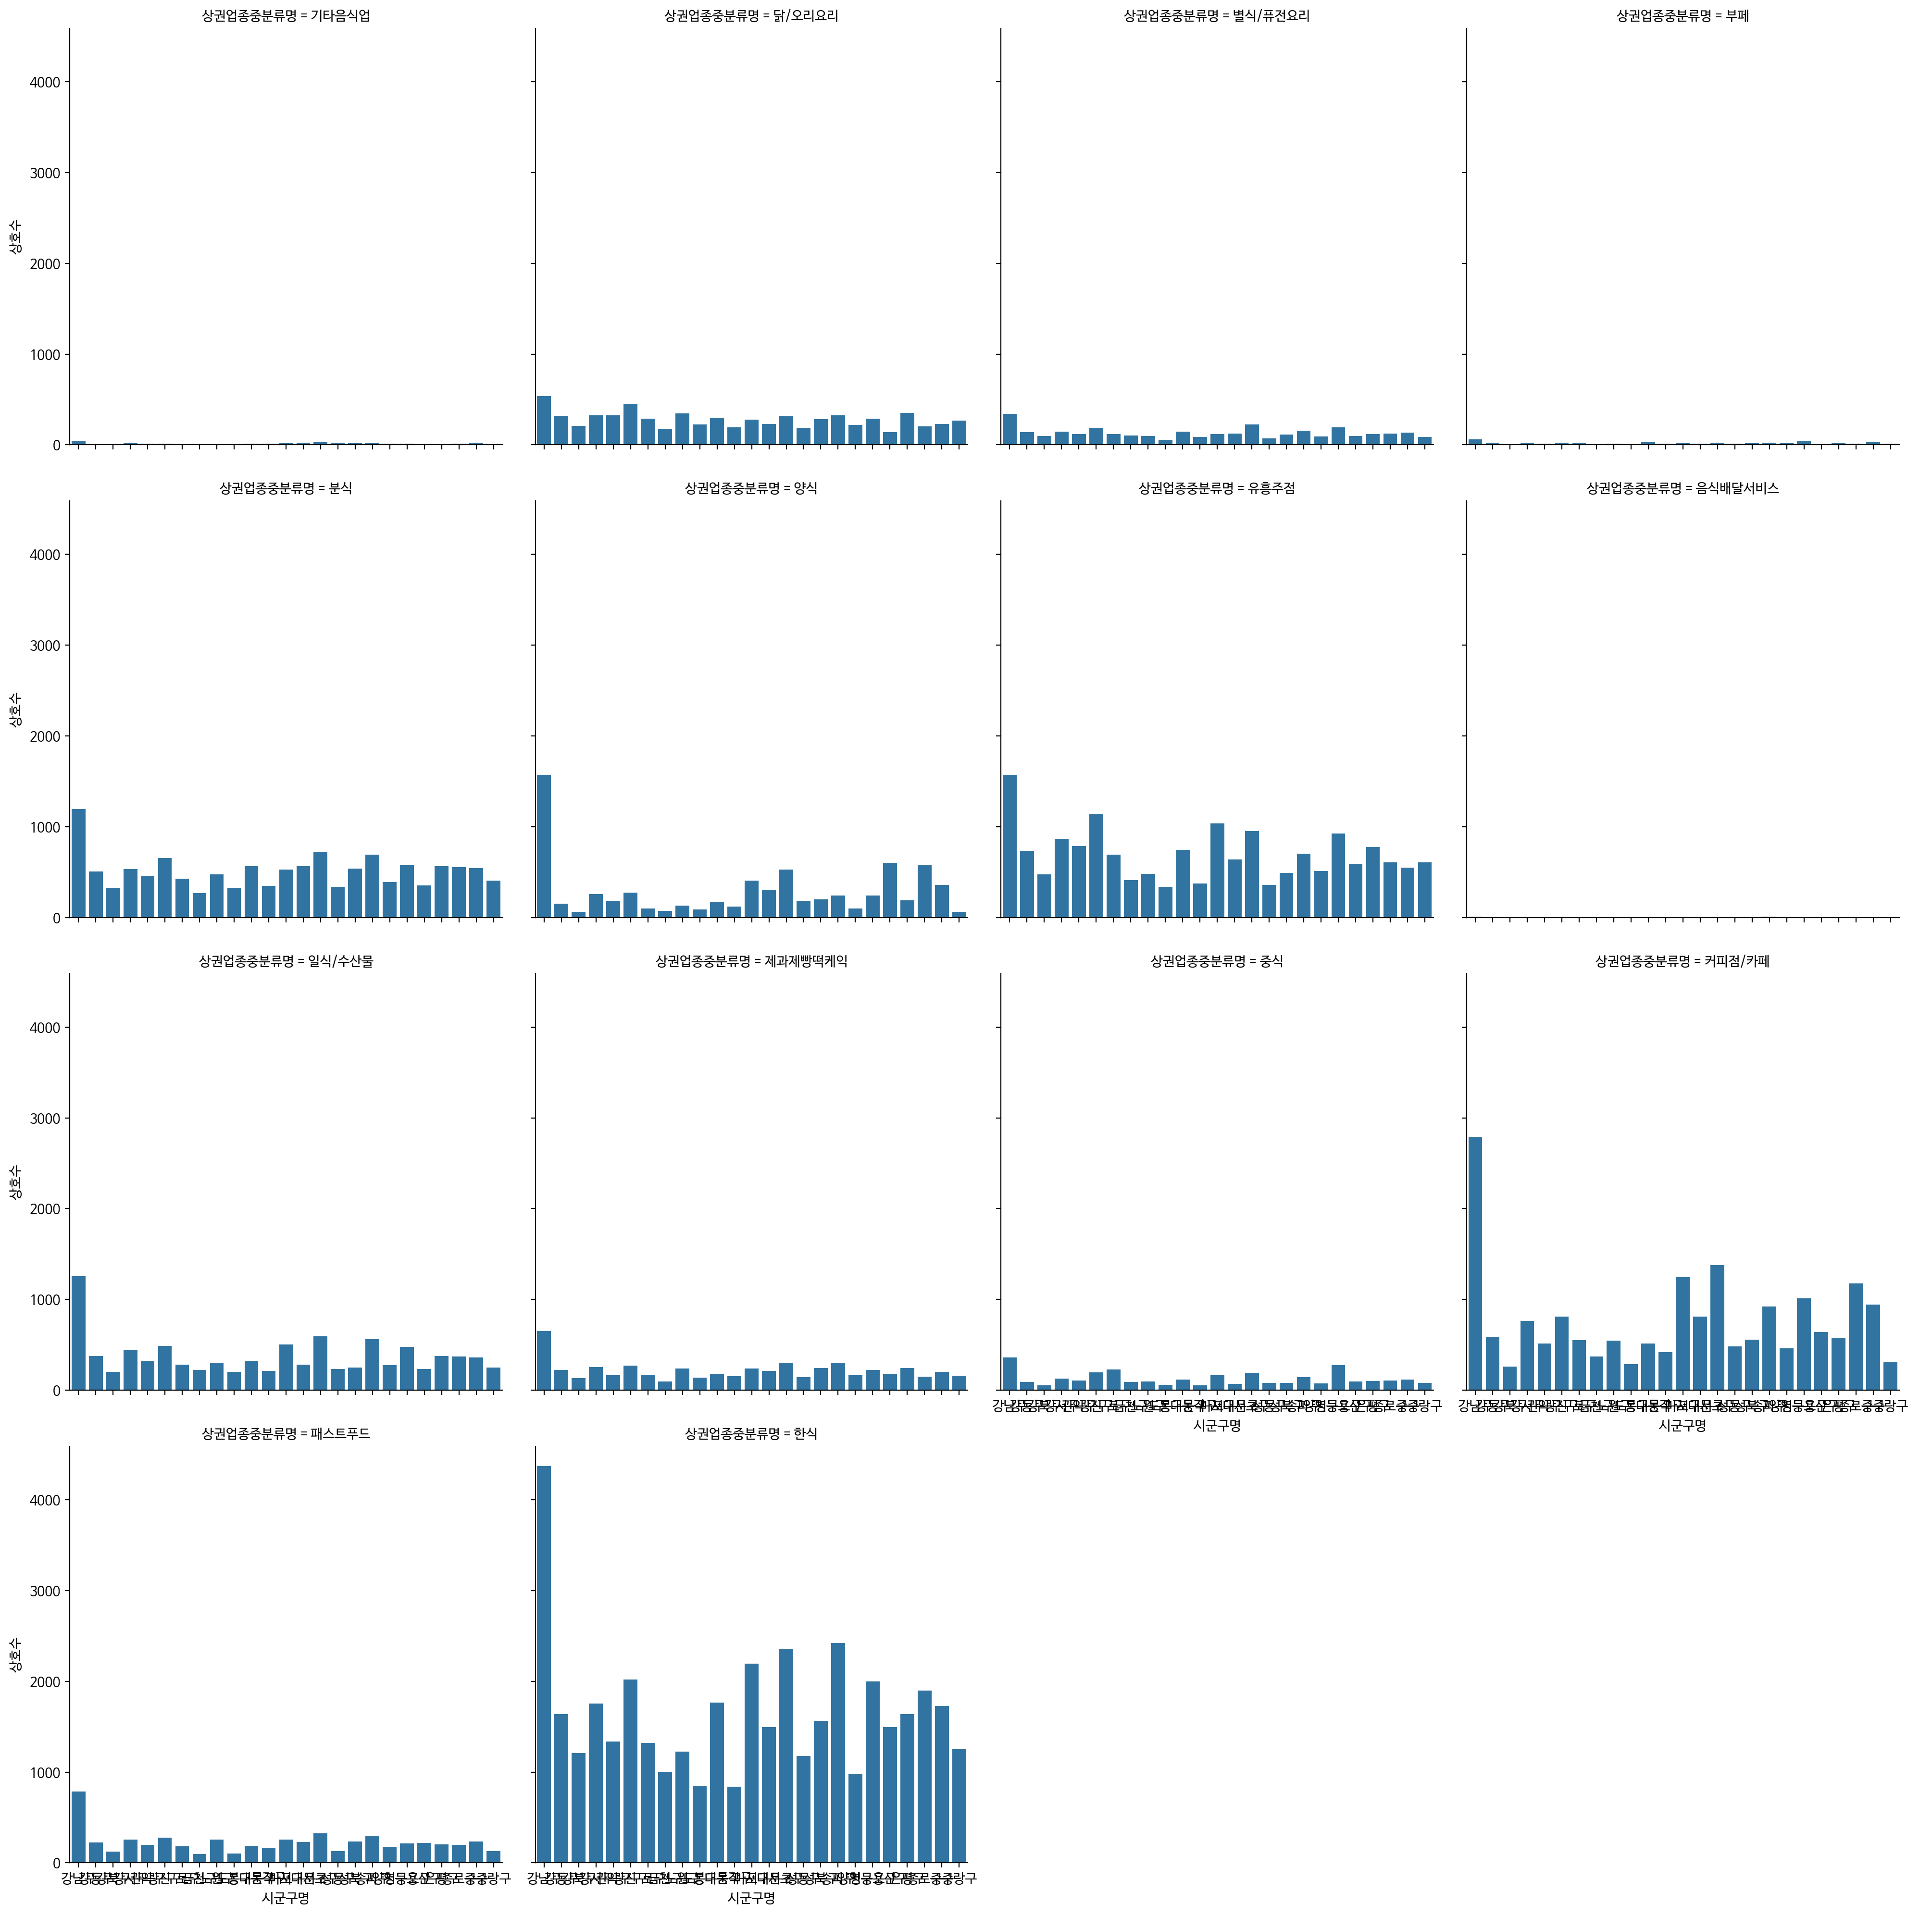

In [89]:
sns.catplot(data=food,x='시군구명',y='상호수',
            kind='bar',col='상권업종중분류명',col_wrap=4)

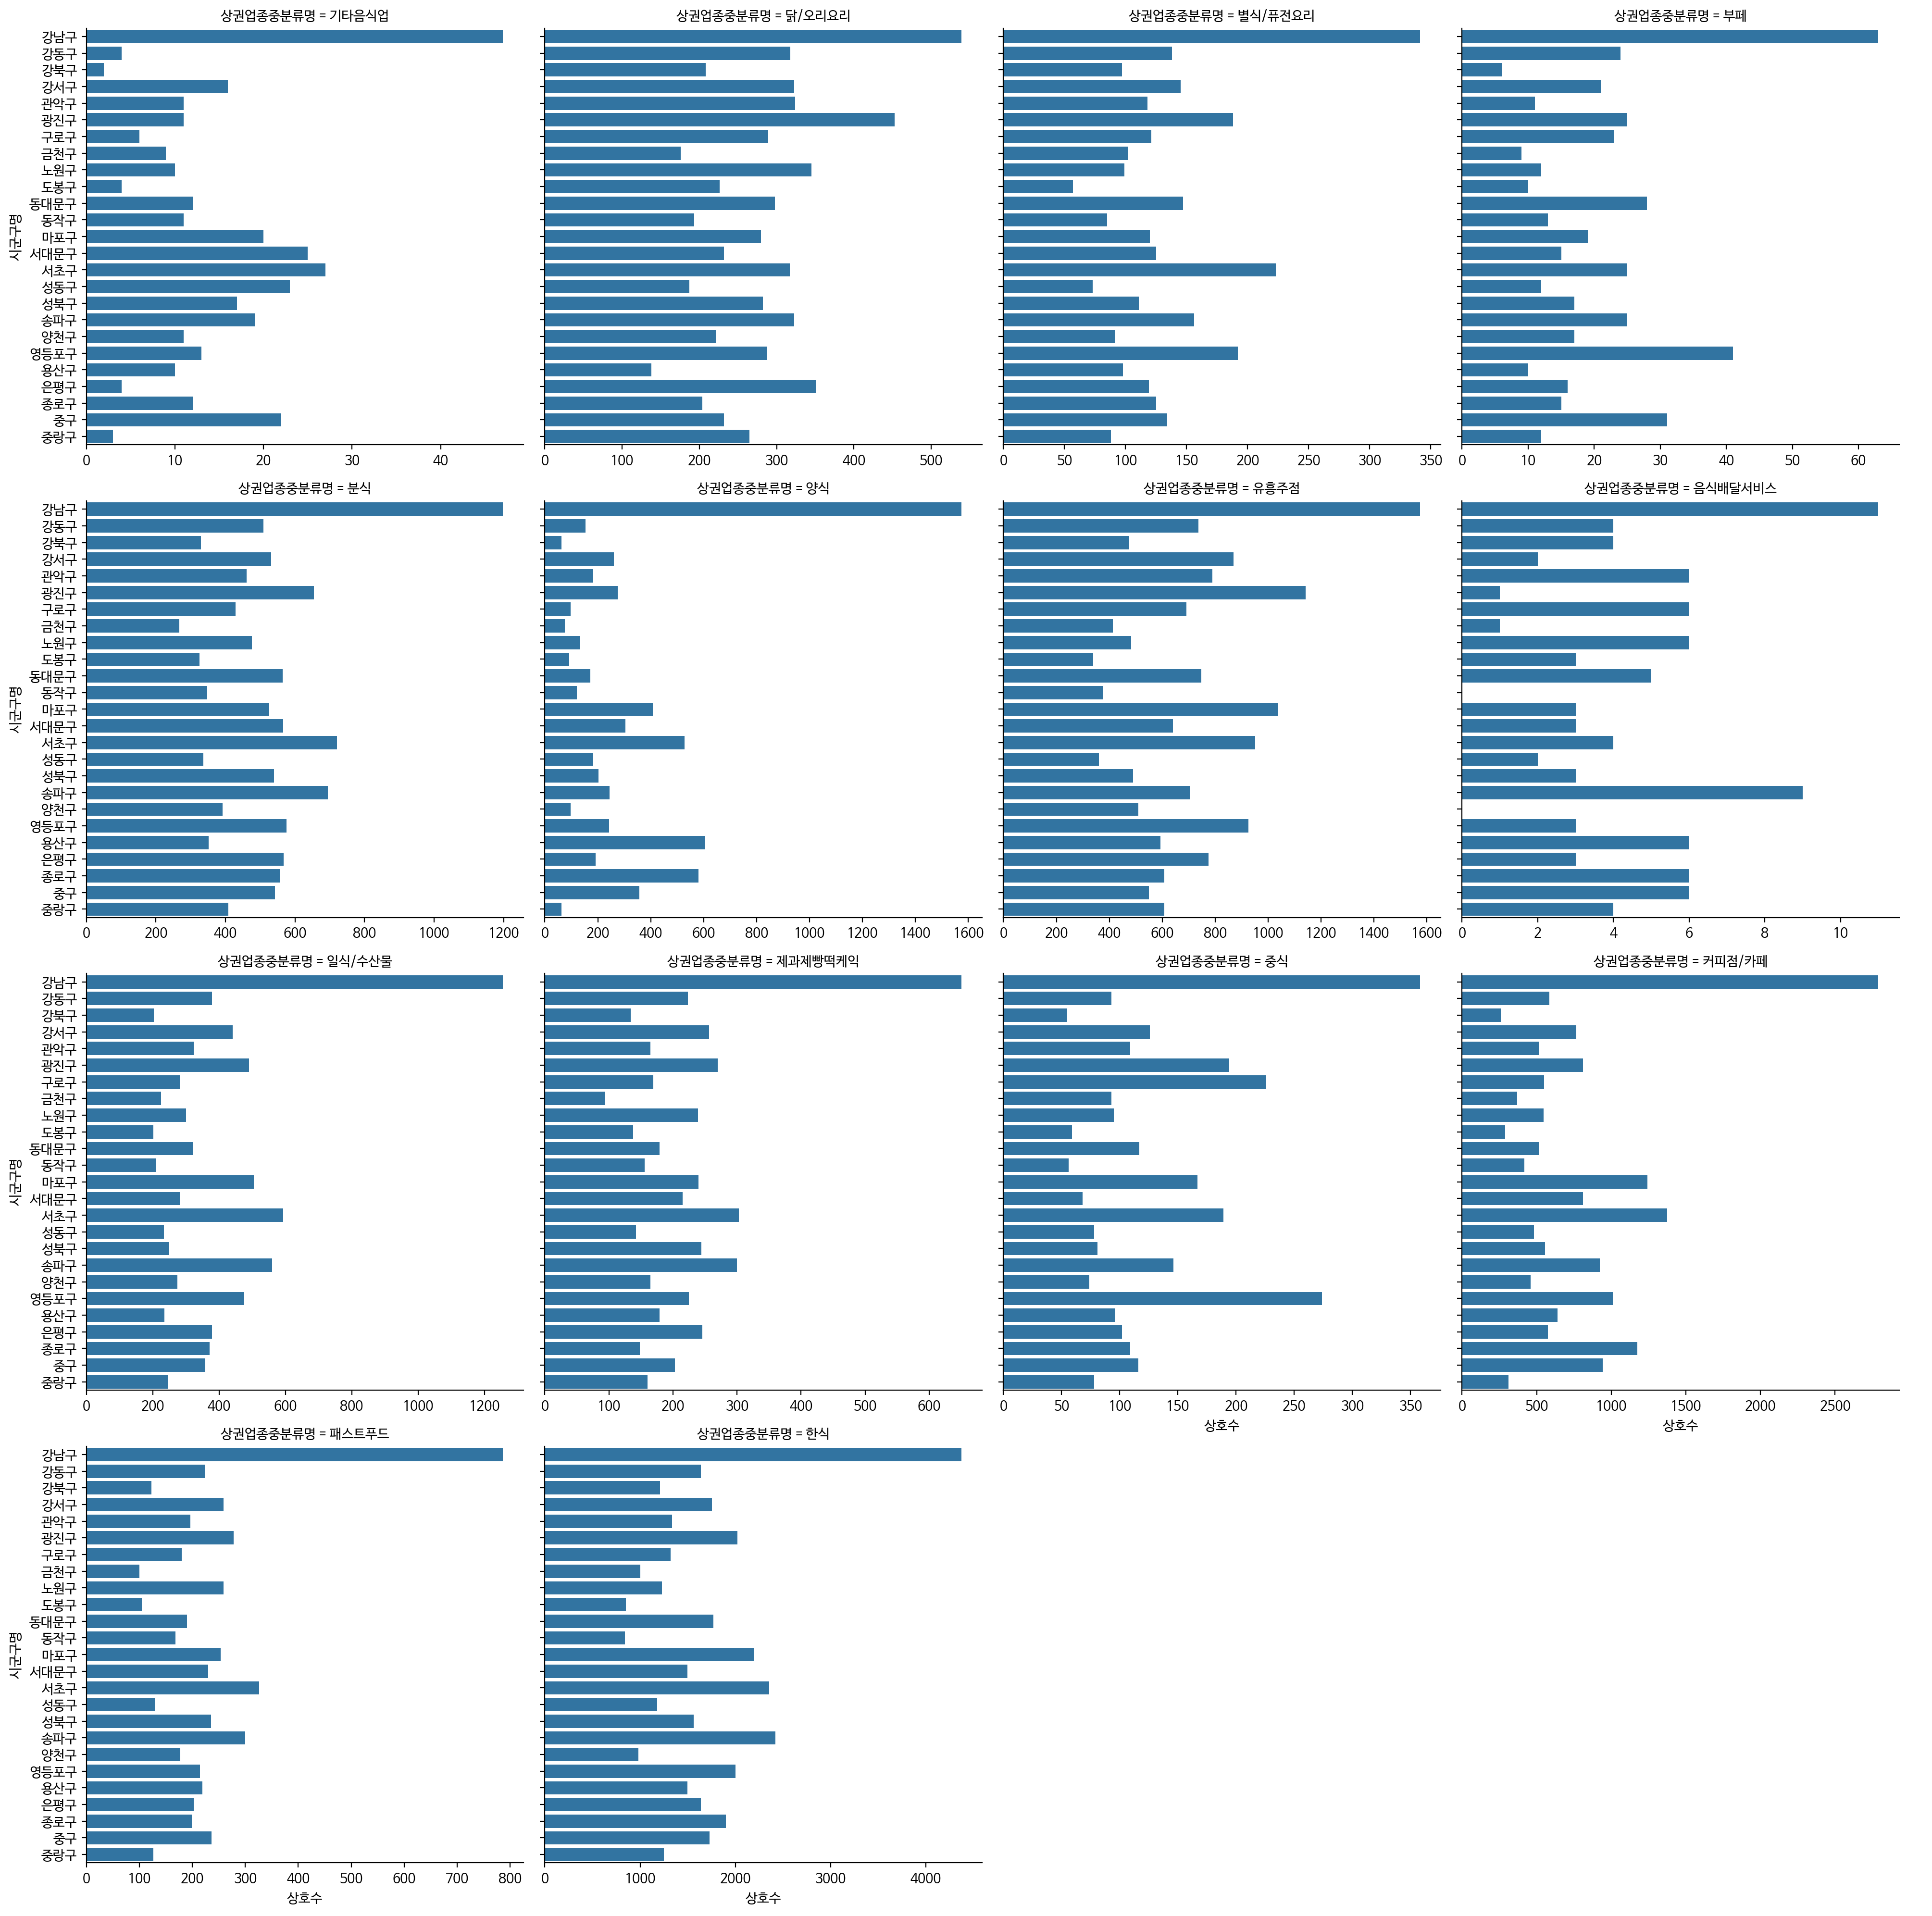

In [90]:
sns.catplot(data=food,y='시군구명',x='상호수',
            kind='bar',col='상권업종중분류명',col_wrap=4,sharex=False)